# Random Walk Testing (Linear Regression) - Small Scale

In [1]:
# Library Imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statistics
from tqdm import tqdm
import random
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### DataFrame Load & Munging

In [4]:
#Loading our team level regular box score dataframe
regularBoxScoreDF = pd.read_excel('../DataScience_Pipeline/RawDataFiles/teamRegularBoxScoreGamelogs.xlsx')
#Loading our team level advanced box score dataframe
advancedBoxScoreDF = pd.read_excel('../DataScience_Pipeline/RawDataFiles/teamAdvancedBoxScoreGamelogs.xlsx')

In [8]:
# Subtracting fields from our regular box score dataframe that we dont need
regularBoxScoreDF = regularBoxScoreDF[[
    'Date',
    'Team',
    'Team_Points'
    
]]
# Subtracting fields from our advanced box score dataframe that we dont need
advancedBoxScoreDF = advancedBoxScoreDF[[
    'Date',
    'Team',
    'Pace',
    'Offensive_EFG',
    'OffensiveRating',
    'TrueShootingRate'
    
]]

# Team 1 DataFrame Join
Merged_df = pd.merge(regularBoxScoreDF, advancedBoxScoreDF, on=['Date','Team'], how='left')
#Below line commented out for larger scale testing
#Merged_df = Merged_df[Merged_df['Team']=='BOS']

predictors = [
      
                'Pace',
                'Offensive_EFG',
                'OffensiveRating',
                'TrueShootingRate'    
            ]

In [10]:
TrainingData = Merged_df[Merged_df['Date']<'2024-10-26']


### NBA Team Testing

In [40]:
# Creating a list of game dates for PHI

# Season 2024 filter
#TargetDayList = Merged_df[Merged_df['Date']>'2023-10-26']['Date'].to_list()
# Season 2023 filter
#TargetDayList = Merged_df[(Merged_df['Date']>='2022-10-26') & (Merged_df['Date']<'2023-10-26')]['Date'].to_list()

# Season 2022 filter
#TargetDayList = Merged_df[(Merged_df['Date']>='2021-10-26') & (Merged_df['Date']<'2022-10-26')]['Date'].to_list()

In [12]:
predictionMean = []
DateList = []
TeamList = []
TeamPointsList = []


TestList = [
            'MIL','TOR','BOS','IND'
           ,'MIA','PHI','BRK','ORL'
           ,'CHO','WAS','CHI','NYK'
           ,'DET','ATL','CLE','LAL'
           ,'LAC','DEN','HOU','OKC'
           ,'UTA','DAL','POR','MEM'
           ,'PHO','SAS','SAC','NOP'
           ,'MIN','GSW'
           ]

In [44]:
for team in tqdm(TestList):
    TestingDataset_df = Merged_df[Merged_df['Team']==team]
    TargetDayList = TestingDataset_df[(TestingDataset_df['Date']>='2024-10-26') & (TestingDataset_df['Date']<'2025-10-26')]['Date'].to_list()
    for day in TargetDayList:
        TargetFrameForBinning = TestingDataset_df[TestingDataset_df['Date'] < day].tail(7)
        histTS, binsTS = np.histogram(TargetFrameForBinning['TrueShootingRate'], bins=10)
        histPace, binsPace = np.histogram(TargetFrameForBinning['Pace'], bins=10)
        histEFG, binsEFG = np.histogram(TargetFrameForBinning['Offensive_EFG'], bins=10)
        histRATE, binsRATE = np.histogram(TargetFrameForBinning['OffensiveRating'], bins=10)

        randomListTrue =[]
        randomListPace =[]
        randomListEFG =[]
        randomListRate =[]

        for x in range(histTS[0]):
            randomListTrue.append(random.uniform(binsTS[0],binsTS[1]))   
        for x in range(histTS[1]):
            randomListTrue.append(random.uniform(binsTS[1],binsTS[2]))   
        for x in range(histTS[2]):
            randomListTrue.append(random.uniform(binsTS[2],binsTS[3]))   
        for x in range(histTS[3]):
            randomListTrue.append(random.uniform(binsTS[3],binsTS[4]))   
        for x in range(histTS[4]):
            randomListTrue.append(random.uniform(binsTS[4],binsTS[5]))   
        for x in range(histTS[5]):
            randomListTrue.append(random.uniform(binsTS[5],binsTS[6]))   
        for x in range(histTS[6]):
            randomListTrue.append(random.uniform(binsTS[6],binsTS[7]))
        for x in range(histTS[7]):
            randomListTrue.append(random.uniform(binsTS[7],binsTS[8]))
        for x in range(histTS[8]):
            randomListTrue.append(random.uniform(binsTS[8],binsTS[9]))   
        for x in range(histTS[9]):
            randomListTrue.append(random.uniform(binsTS[9],binsTS[10]))

        for x in range(histPace[0]):
            randomListPace.append(random.uniform(binsPace[0],binsPace[1]))   
        for x in range(histPace[1]):
            randomListPace.append(random.uniform(binsPace[1],binsPace[2]))   
        for x in range(histPace[2]):
            randomListPace.append(random.uniform(binsPace[2],binsPace[3]))   
        for x in range(histPace[3]):
            randomListPace.append(random.uniform(binsPace[3],binsPace[4]))   
        for x in range(histPace[4]):
            randomListPace.append(random.uniform(binsPace[4],binsPace[5]))   
        for x in range(histPace[5]):
            randomListPace.append(random.uniform(binsPace[5],binsPace[6]))   
        for x in range(histPace[6]):
            randomListPace.append(random.uniform(binsPace[6],binsPace[7]))
        for x in range(histPace[7]):
            randomListPace.append(random.uniform(binsPace[7],binsPace[8]))
        for x in range(histPace[8]):
            randomListPace.append(random.uniform(binsPace[8],binsPace[9]))   
        for x in range(histPace[9]):
            randomListPace.append(random.uniform(binsPace[9],binsPace[10]))      

        for x in range(histEFG[0]):
            randomListEFG.append(random.uniform(binsEFG[0],binsEFG[1]))   
        for x in range(histEFG[1]):
            randomListEFG.append(random.uniform(binsEFG[1],binsEFG[2]))   
        for x in range(histEFG[2]):
            randomListEFG.append(random.uniform(binsEFG[2],binsEFG[3]))   
        for x in range(histEFG[3]):
            randomListEFG.append(random.uniform(binsEFG[3],binsEFG[4]))   
        for x in range(histEFG[4]):
            randomListEFG.append(random.uniform(binsEFG[4],binsEFG[5]))   
        for x in range(histEFG[5]):
            randomListEFG.append(random.uniform(binsEFG[5],binsEFG[6]))   
        for x in range(histEFG[6]):
            randomListEFG.append(random.uniform(binsEFG[6],binsEFG[7]))
        for x in range(histEFG[7]):
            randomListEFG.append(random.uniform(binsEFG[7],binsEFG[8]))
        for x in range(histEFG[8]):
            randomListEFG.append(random.uniform(binsEFG[8],binsEFG[9]))   
        for x in range(histEFG[9]):
            randomListEFG.append(random.uniform(binsEFG[9],binsEFG[10]))

        for x in range(histRATE[0]):
            randomListRate.append(random.uniform(binsRATE[0],binsRATE[1]))   
        for x in range(histRATE[1]):
            randomListRate.append(random.uniform(binsRATE[1],binsRATE[2]))   
        for x in range(histRATE[2]):
            randomListRate.append(random.uniform(binsRATE[2],binsRATE[3]))   
        for x in range(histRATE[3]):
            randomListRate.append(random.uniform(binsRATE[3],binsRATE[4]))   
        for x in range(histRATE[4]):
            randomListRate.append(random.uniform(binsRATE[4],binsRATE[5]))   
        for x in range(histRATE[5]):
            randomListRate.append(random.uniform(binsRATE[5],binsRATE[6]))   
        for x in range(histRATE[6]):
            randomListRate.append(random.uniform(binsRATE[6],binsRATE[7]))
        for x in range(histRATE[7]):
            randomListRate.append(random.uniform(binsRATE[7],binsRATE[8]))
        for x in range(histRATE[8]):
            randomListRate.append(random.uniform(binsRATE[8],binsRATE[9]))   
        for x in range(histRATE[9]):
            randomListRate.append(random.uniform(binsRATE[9],binsRATE[10]))

        unique_combinations = []

        for k in range(len(randomListPace)):
            for l in range(len(randomListEFG)):
                for m in range(len(randomListRate)):
                    for n in range(len(randomListTrue)):
                        unique_combinations.append((randomListPace[k],randomListEFG[l],randomListRate[m],randomListTrue[n]))
        X_train, X_test, y_train, y_test = train_test_split(TrainingData[predictors], TrainingData['Team_Points'])
        lr = LinearRegression()
        lr.fit(X_train,y_train)                    
        predictions = []
        for combo in unique_combinations:
            test_params = {'Pace':combo[0],
                           'Offensive_EFG':combo[1],
                           'OffensiveRating':combo[2],
                           'TrueShootingRate':combo[3],
                               }
            #Creating the test dataframe
            TestingData = pd.DataFrame(test_params, columns=['Pace'
                                                             ,'Offensive_EFG'
                                                             ,'OffensiveRating'
                                                             ,'TrueShootingRate'
                                                            ],index=[0]
                                      )
            # Creating our predictions
            y_pred=lr.predict(TestingData[predictors])
            predictions.append(y_pred[0])               
        hist, bins = np.histogram(predictions, bins=10)
        #predictionsLowerBound.append(bins[0])
        #predictionsUpperBound.append(bins[-1])
        mean = sum(predictions)/len(predictions)
       
        predictionMean.append(mean)#
       
        DateList.append(day)
        TeamList.append(team)

100%|██████████| 30/30 [1:33:16<00:00, 186.56s/it]


In [46]:
ResultsFrame = pd.DataFrame({
                            'Date': DateList,
                            'Team': TeamList,
                            'Mean Prediction':predictionMean,
                            



})

In [48]:
ResultsFrame = pd.merge(ResultsFrame, Merged_df, on=['Date','Team'], how='left')

In [50]:
ResultsFrame=ResultsFrame[['Date',
                           'Team',
                           'Team_Points',
                           'Mean Prediction',
                          
                          ]]

In [52]:
ResultsFrame['Error'] = ResultsFrame['Mean Prediction'] - ResultsFrame['Team_Points']
ResultsFrame['Abs Error'] = abs(ResultsFrame['Error'])

In [54]:
ResultsFrame['Season'] = '2023-2024'

In [56]:
ResultsFrame['Error'].mean()

0.15601848665094498

In [58]:
ResultsFrame['Abs Error'].mean()

10.139869217317294

In [60]:
ResultsFrame

,Date,Team,Team_Points,Mean Prediction,Error,Abs Error,Season
0,2023-10-26,MIL,118,117.373674,-0.626326,0.626326,2023-2024
1,2023-10-29,MIL,110,113.933819,3.933819,3.933819,2023-2024
2,2023-10-30,MIL,122,115.969962,-6.030038,6.030038,2023-2024
3,2023-11-01,MIL,111,115.996783,4.996783,4.996783,2023-2024
4,2023-11-03,MIL,110,112.517379,2.517379,2.517379,2023-2024
...,...,...,...,...,...,...,...
2427,2024-04-07,GSW,118,114.161020,-3.838980,3.838980,2023-2024
2428,2024-04-09,GSW,134,114.194045,-19.805955,19.805955,2023-2024
2429,2024-04-11,GSW,100,119.187574,19.187574,19.187574,2023-2024
2430,2024-04-12,GSW,109,116.812584,7.812584,7.812584,2023-2024


In [62]:
ResultsFrame.to_excel('./TestingResults/Season2023.xlsx')

(array([  3.,   0.,   3.,   5.,   6.,   7.,  13.,  17.,  35.,  49.,  56.,
         65.,  87.,  93., 107., 119., 145., 164., 153., 148., 162., 170.,
        149., 135.,  98., 107.,  80.,  60.,  65.,  47.,  23.,  23.,  15.,
         13.,   3.,   2.,   3.,   1.,   0.,   1.]),
 array([-41.53727734, -39.40139483, -37.26551232, -35.12962981,
        -32.9937473 , -30.85786479, -28.72198228, -26.58609977,
        -24.45021726, -22.31433475, -20.17845224, -18.04256973,
        -15.90668722, -13.77080471, -11.6349222 ,  -9.4990397 ,
         -7.36315719,  -5.22727468,  -3.09139217,  -0.95550966,
          1.18037285,   3.31625536,   5.45213787,   7.58802038,
          9.72390289,  11.8597854 ,  13.99566791,  16.13155042,
         18.26743293,  20.40331544,  22.53919795,  24.67508046,
         26.81096297,  28.94684548,  31.08272799,  33.2186105 ,
         35.35449301,  37.49037551,  39.62625802,  41.76214053,
         43.89802304]),
 <BarContainer object of 40 artists>)

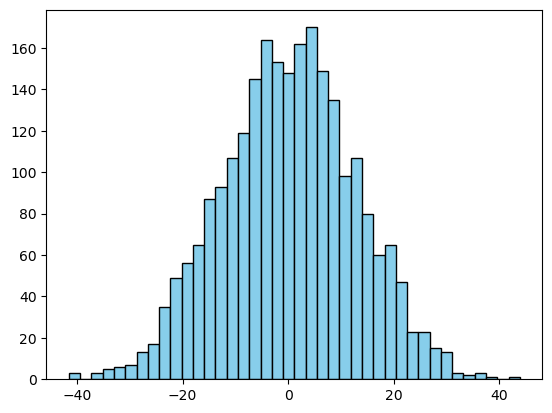

In [64]:
# Plotting a basic histogram
import matplotlib.pyplot as plt
plt.hist(ResultsFrame['Error'], bins=40, color='skyblue', edgecolor='black')

(array([154., 156., 170., 167., 170., 160., 143., 126., 132., 103., 109.,
         94.,  96., 100.,  62.,  71.,  61.,  58.,  63.,  48.,  35.,  28.,
         18.,  29.,  15.,   9.,  15.,  12.,   7.,   3.,   4.,   3.,   3.,
          3.,   0.,   1.,   1.,   2.,   0.,   1.]),
 array([1.08091946e-03, 1.09850447e+00, 2.19592803e+00, 3.29335158e+00,
        4.39077513e+00, 5.48819868e+00, 6.58562224e+00, 7.68304579e+00,
        8.78046934e+00, 9.87789290e+00, 1.09753165e+01, 1.20727400e+01,
        1.31701636e+01, 1.42675871e+01, 1.53650107e+01, 1.64624342e+01,
        1.75598578e+01, 1.86572813e+01, 1.97547049e+01, 2.08521284e+01,
        2.19495520e+01, 2.30469755e+01, 2.41443991e+01, 2.52418226e+01,
        2.63392462e+01, 2.74366697e+01, 2.85340933e+01, 2.96315169e+01,
        3.07289404e+01, 3.18263640e+01, 3.29237875e+01, 3.40212111e+01,
        3.51186346e+01, 3.62160582e+01, 3.73134817e+01, 3.84109053e+01,
        3.95083288e+01, 4.06057524e+01, 4.17031759e+01, 4.28005995e+01,
      

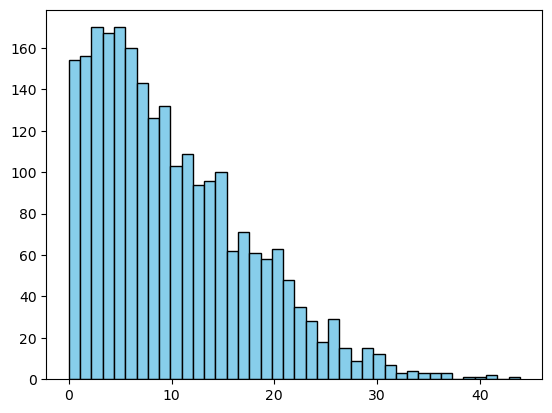

In [66]:
plt.hist(ResultsFrame['Abs Error'], bins=40, color='skyblue', edgecolor='black')

## End of Testing Notebook